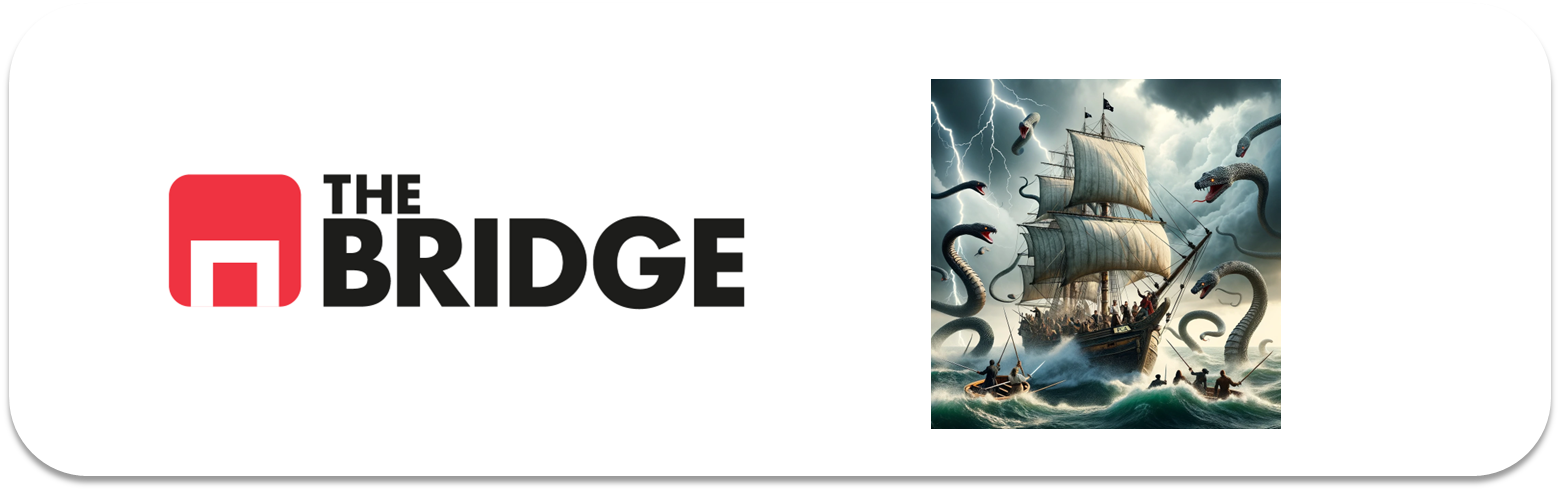

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import bootcampviztools as bt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, mutual_info_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


### 1. Carga de Dataset


In [59]:
#Vamos a cargar nuestro dataset.

df_credit = pd.read_csv("./data/credit_npo.csv")

df_credit.info()
df_credit.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [60]:
#Nos deshacemos de las columnas con nulos. 

null_col = ["NumberOfDependents","MonthlyIncome"]
df_credit.drop(null_col, inplace= True, axis= 1)

df_credit.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,8.482332,0.259312,0.999202,0.228364
std,0.253321,0.368148,15.077498,4.055787,9.122216,5.165422,4.035658,1.134325,4.018873
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,11.000000,0.000000,2.000000,0.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,49.000000,98.000000,19.000000,98.000000


In [61]:
print(df_credit["NumberOfOpenCreditLinesAndLoans"].value_counts().sort_values(ascending= True))
print(df_credit["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_values(ascending= True))
print(df_credit["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_values(ascending= True))
print(df_credit["NumberOfTimes90DaysLate"].value_counts().sort_values(ascending= True))
print(df_credit["NumberRealEstateLoansOrLines"].value_counts().sort_values(ascending= True))

NumberOfOpenCreditLinesAndLoans
40       1
48       1
41       1
38       1
36       1
43       1
49       1
35       2
34       2
32       3
33       4
31       7
29      10
30      10
28      13
27      16
26      19
25      30
24      38
23      39
22      61
21      62
20     118
19     129
18     153
0      192
17     217
16     239
15     341
14     368
1      416
13     459
2      547
12     580
3      722
11     732
10     782
4      935
9      977
5     1035
8     1037
6     1087
7     1148
Name: count, dtype: int64
NumberOfTime30-59DaysPastDueNotWorse
7         1
8         2
6        20
98       21
5        23
4        64
3       128
2       401
1      1377
0     10500
Name: count, dtype: int64
NumberOfTime60-89DaysPastDueNotWorse
11        1
5         4
4        14
3        18
98       21
2        86
1       492
0     11901
Name: count, dtype: int64
NumberOfTimes90DaysLate
10        1
9         1
13        1
8         3
7         4
6         6
5        14
98       21
4      

In [62]:
df_credit["NumberOfTimes90DaysLate_cat"] = pd.cut(df_credit["NumberOfTimes90DaysLate"],
                                                    bins=[-1, 0, 1, float("inf")],
                                                    labels= ['0 retrasos', '1-2 retrasos', '3 o más retrasos'])
df_credit["NumberOfTime30-59DaysPastDueNotWorse_cat"] = pd.cut(df_credit["NumberOfTime30-59DaysPastDueNotWorse"],
                                                    bins=[-1, 0, float("inf")],
                                                    labels= ["0 retrasos", "Se retraso"])
df_credit["NumberOfTime60-89DaysPastDueNotWorse_cat"] = pd.cut(df_credit["NumberOfTime60-89DaysPastDueNotWorse"],
                                                    bins=[-1, 0, float("inf")],
                                                    labels= ['0 retrasos', "Se retraso"])

In [63]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df_credit["NumberOfTimes90DaysLate_encode"] = encoder.fit_transform(df_credit[["NumberOfTimes90DaysLate_cat"]])
df_credit["NumberOfTime30-59DaysPastDueNotWorse_encode"] = encoder.fit_transform(df_credit[["NumberOfTime30-59DaysPastDueNotWorse_cat"]])
df_credit["NumberOfTime60-89DaysPastDueNotWorse_encode"] = encoder.fit_transform(df_credit[["NumberOfTime60-89DaysPastDueNotWorse_cat"]])

In [64]:
df_credit.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate_encode,NumberOfTime30-59DaysPastDueNotWorse_encode,NumberOfTime60-89DaysPastDueNotWorse_encode
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,8.482332,0.259312,0.999202,0.228364,0.078488,0.162479,0.050730
std,0.253321,0.368148,15.077498,4.055787,9.122216,5.165422,4.035658,1.134325,4.018873,0.343456,0.368904,0.219454
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,11.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,49.000000,98.000000,19.000000,98.000000,2.000000,1.000000,1.000000


In [65]:
useless_col = ["NumberOfTimes90DaysLate_cat","NumberOfTime30-59DaysPastDueNotWorse_cat","NumberOfTime60-89DaysPastDueNotWorse_cat","NumberOfTimes90DaysLate","NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse"]

df_credit.drop(useless_col, inplace= True, axis= 1)

df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SeriousDlqin2yrs                             12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines         12537 non-null  float64
 2   age                                          12537 non-null  int64  
 3   DebtRatio                                    12537 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans              12537 non-null  int64  
 5   NumberRealEstateLoansOrLines                 12537 non-null  int64  
 6   NumberOfTimes90DaysLate_encode               12537 non-null  float64
 7   NumberOfTime30-59DaysPastDueNotWorse_encode  12537 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse_encode  12537 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 881.6 KB


### 2. Train Test Split

In [66]:
target = "SeriousDlqin2yrs"

In [67]:
#Momento de separar nuestro dataset

train_set, test_set = train_test_split(df_credit, test_size= 0.2, random_state= 42)


### 3. Mini-EDA

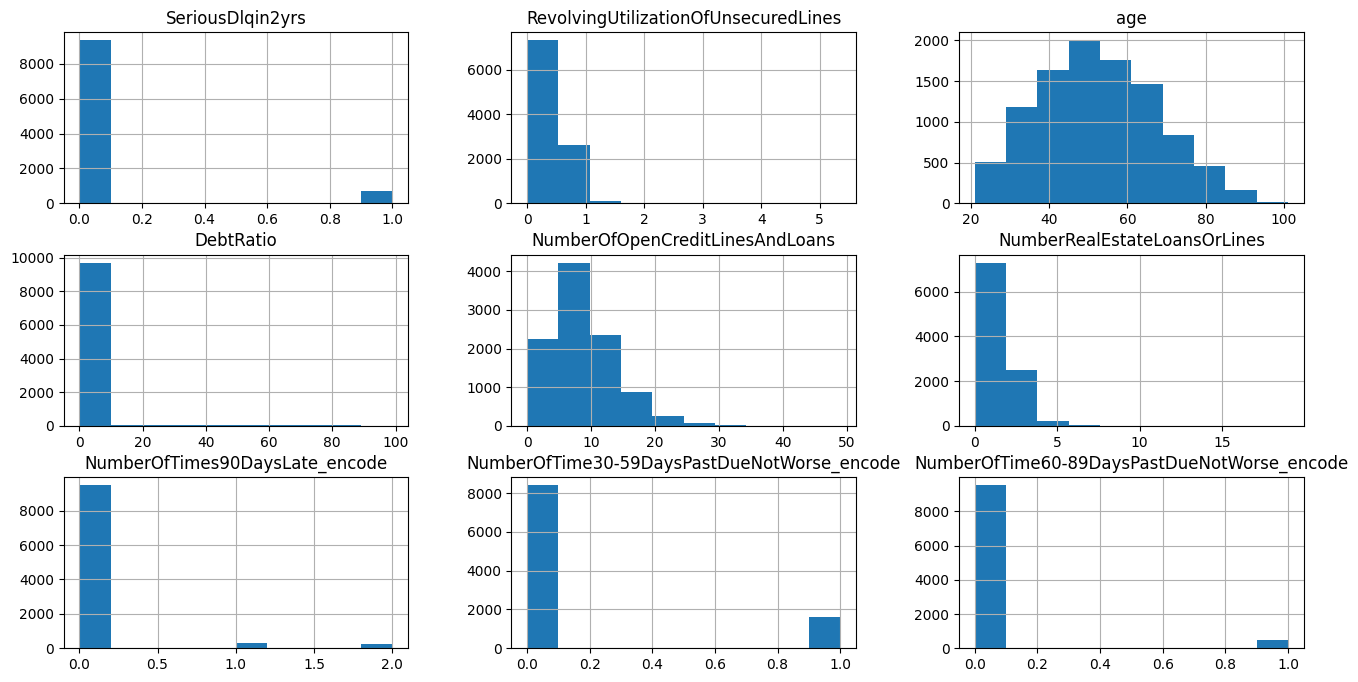

In [68]:
train_set.hist(figsize=(16,8));

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

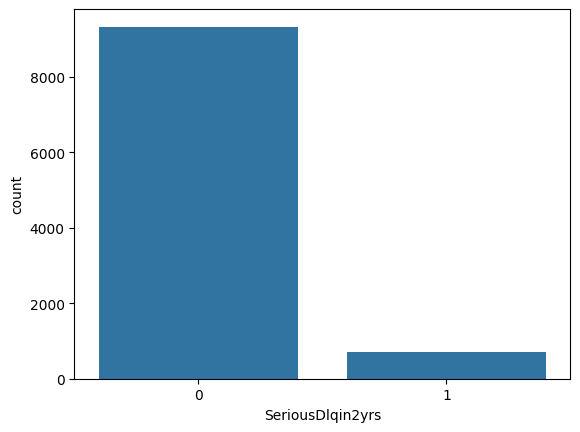

In [69]:
sns.countplot(train_set, x=target) #El target esta claramente desbalanceado. 

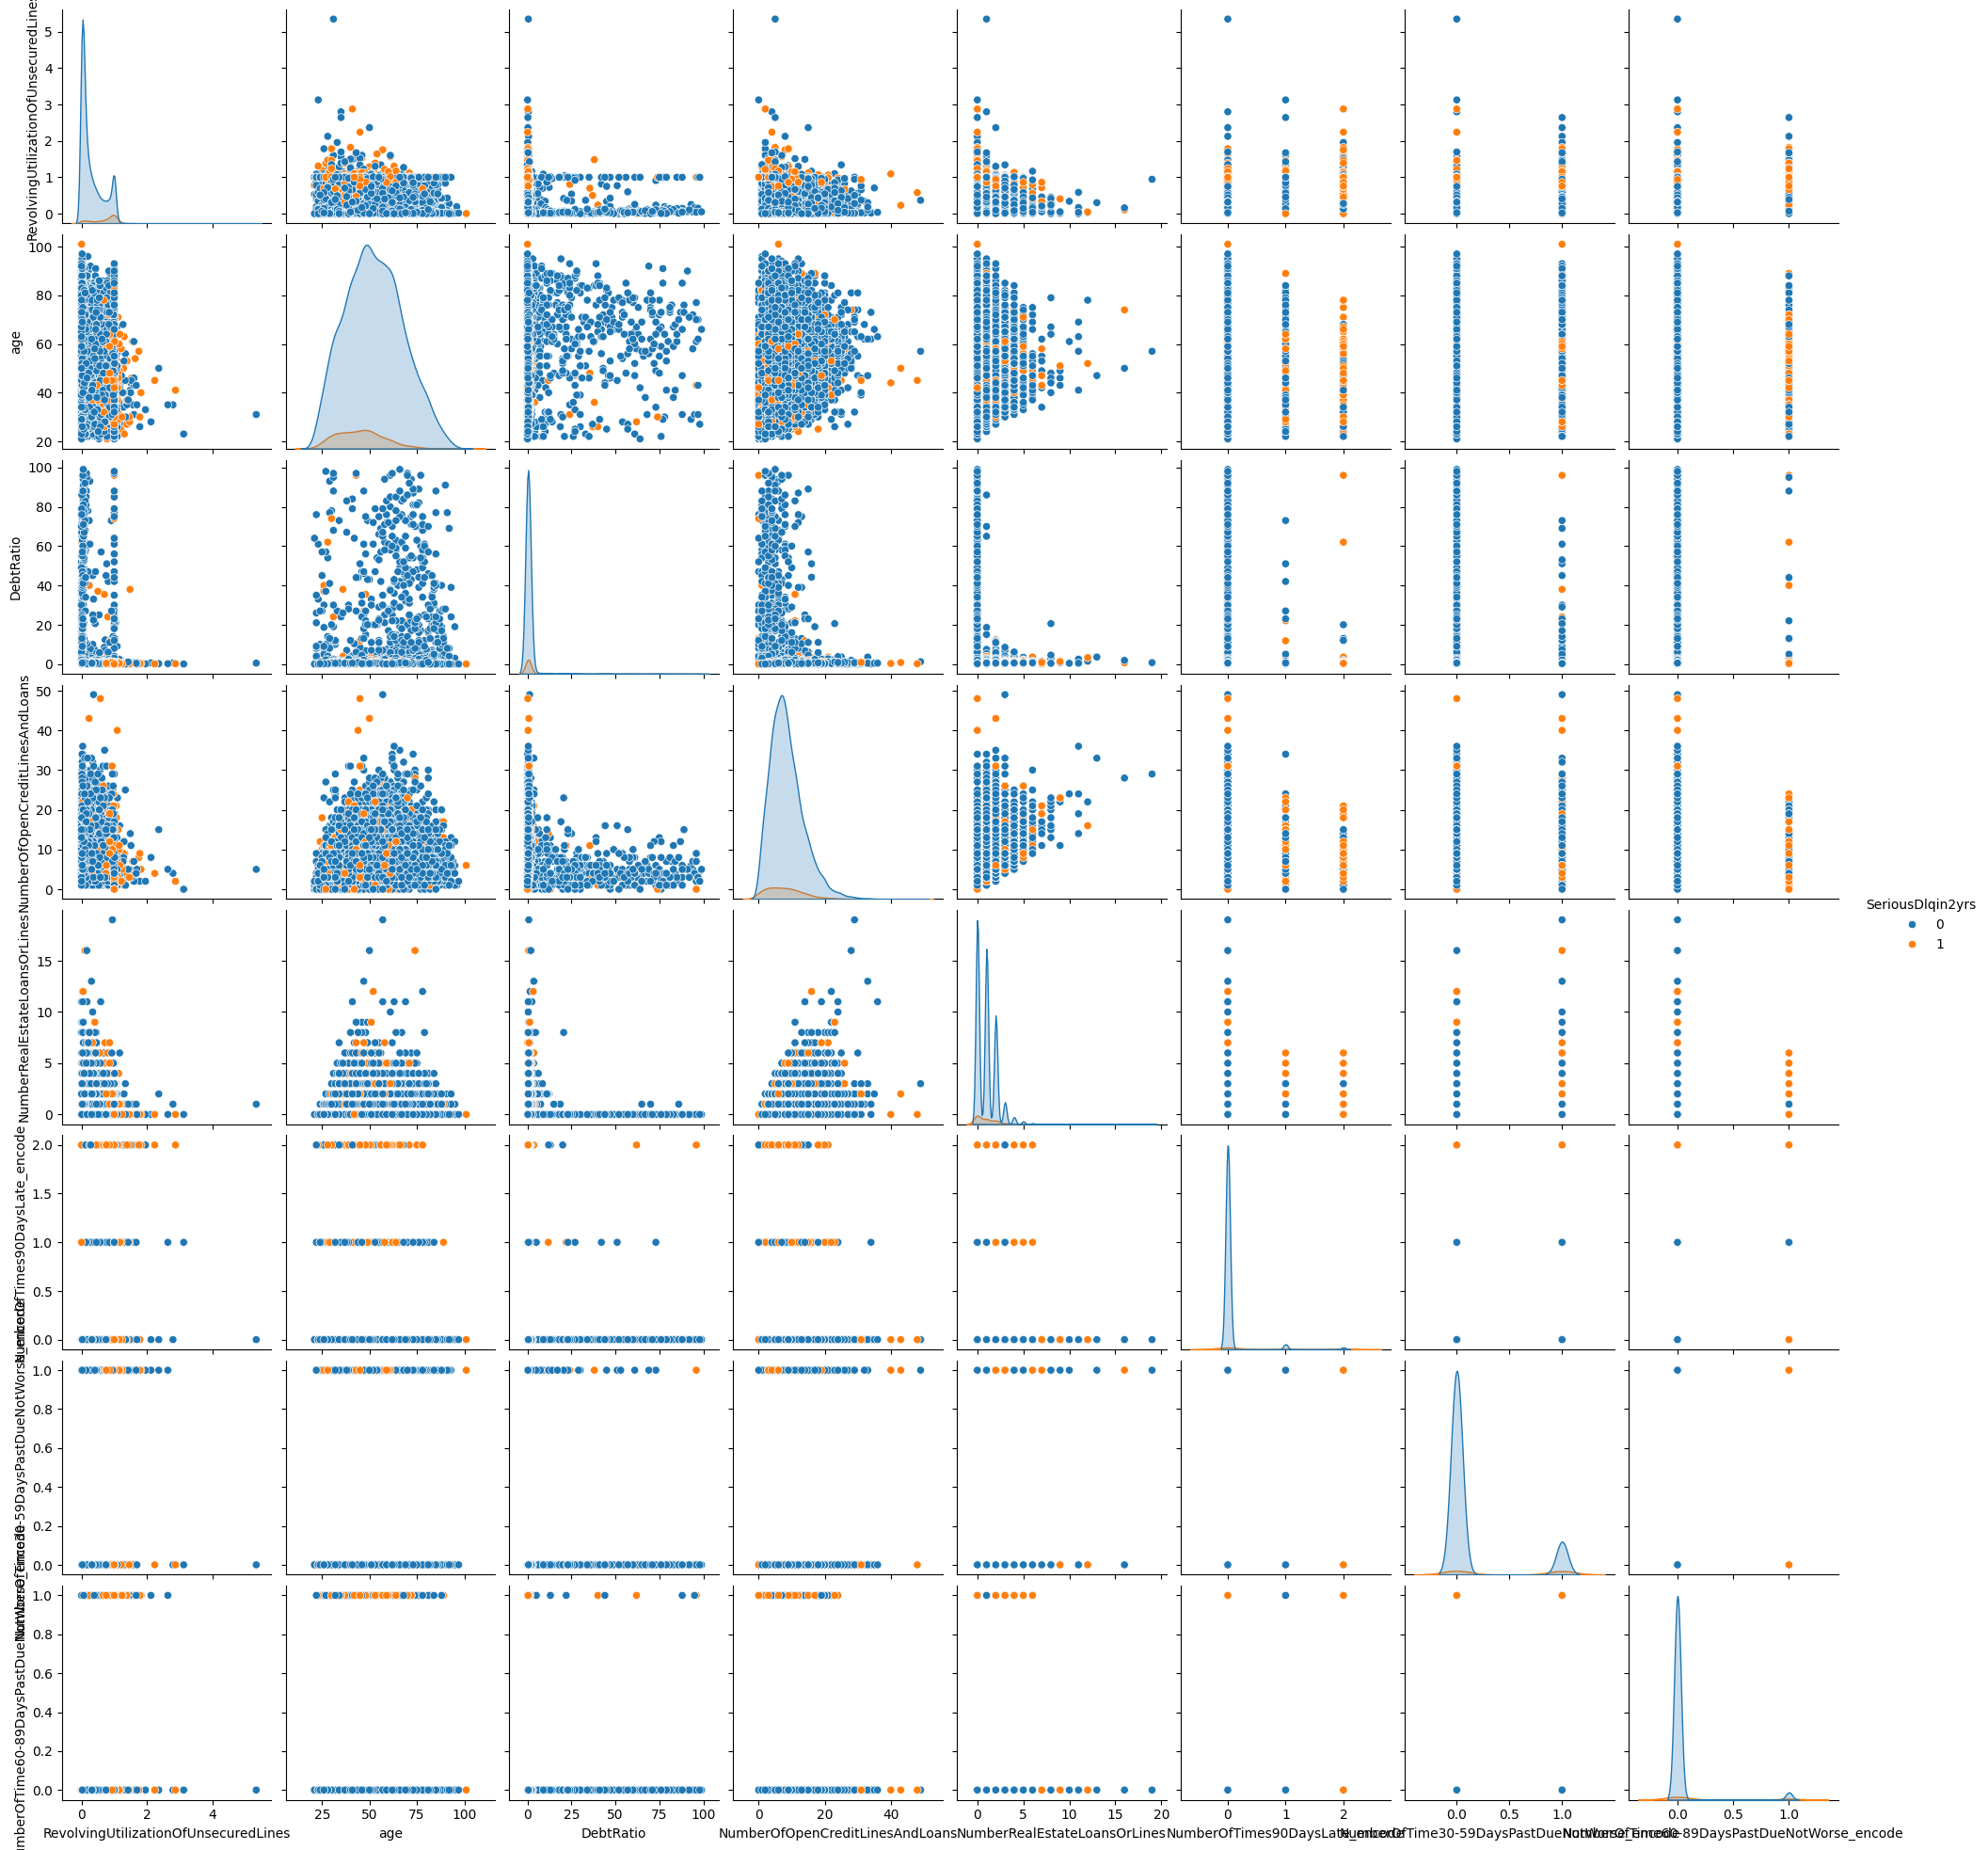

In [70]:
sns.pairplot(train_set, hue= target)

In [72]:
features_cat = ["NumberOfTimes90DaysLate_encode","NumberOfTime30-59DaysPastDueNotWorse_encode","NumberOfTime60-89DaysPastDueNotWorse_encode"]

for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(train_set[col],train_set[target]))

MI(NumberOfTimes90DaysLate_encode;SeriousDlqin2yrs): 0.035200169671458115
MI(NumberOfTime30-59DaysPastDueNotWorse_encode;SeriousDlqin2yrs): 0.020437805969836048
MI(NumberOfTime60-89DaysPastDueNotWorse_encode;SeriousDlqin2yrs): 0.019228693201831515


In [73]:
#Correlacion
corr_ = train_set.corr()
print(corr_)

                                             SeriousDlqin2yrs  \
SeriousDlqin2yrs                                     1.000000   
RevolvingUtilizationOfUnsecuredLines                 0.285014   
age                                                 -0.118734   
DebtRatio                                           -0.022599   
NumberOfOpenCreditLinesAndLoans                     -0.021952   
NumberRealEstateLoansOrLines                         0.010861   
NumberOfTimes90DaysLate_encode                       0.375519   
NumberOfTime30-59DaysPastDueNotWorse_encode          0.232207   
NumberOfTime60-89DaysPastDueNotWorse_encode          0.259460   

                                             RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                         0.285014   
RevolvingUtilizationOfUnsecuredLines                                     1.000000   
age                                                                     -0.283100   
DebtRatio

<Axes: >

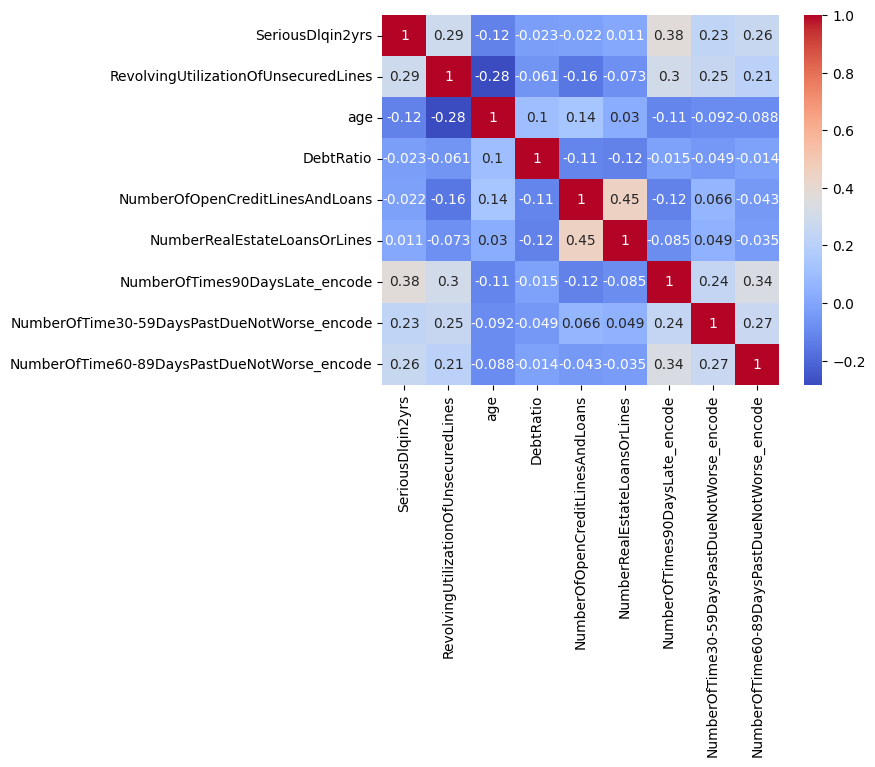

In [75]:
#Heatmap
sns.heatmap(corr_, annot=True, cmap="coolwarm")

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.